This lab train on larger corpus compare to last lab

In [1]:
import tensorflow as tf
import numpy as np 

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [6]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt

--2023-01-08 22:53:59--  https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.35.208, 142.251.32.176, 142.250.68.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.35.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘irish-lyrics-eof.txt.2’

irish-lyrics-eof.tx 100%[===================>]  67.35K  --.-KB/s    in 0.03s   

2023-01-08 22:53:59 (1.93 MB/s) - ‘irish-lyrics-eof.txt.2’ saved [68970/68970]



In [7]:
# Load the dataset
data = open('irish-lyrics-eof.txt').read()

# Lowercase and split the text
corpus = data.lower().split("\n")

# Preview the result
print(corpus[:5])
print(len(corpus))

['come all ye maidens young and fair', 'and you that are blooming in your prime', 'always beware and keep your garden fair', 'let no man steal away your thyme', 'for thyme it is a precious thing']
1693


In [8]:
# Initialize the Tokenizer class
tokenizer = Tokenizer()

# Generate the word index dictionary
tokenizer.fit_on_texts(corpus)

# Define the total words. You add 1 for the index `0` which is just the padding token.
total_words = len(tokenizer.word_index) + 1

# print(f'word index dictionary: {tokenizer.word_index}')
print({k:w for (k,w) in [x for x in tokenizer.word_index.items()][:20]})
print(f'total words: {total_words}')

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20}
total words: 2690


#### Word Index dictionary is generated, now preprocess the dataset
* xs is the inputs to the model. It should be padded sequences
* ys is the labels and should be one-hot encoded arrarys

In [9]:
# Loop over every line
for line in corpus[:5]:
    print(tokenizer.texts_to_sequences([line])[0])
    token_list = tokenizer.texts_to_sequences([line])[0]
    
    for i in range(1, len(token_list)):
        # Generate the subphrase
        n_gram_sequence = token_list[:i+1]
        print(n_gram_sequence)
        # Append the subphrase to the sequences list
        # input_sequences.append(n_gram_sequence)
    print("")
    print("---------------------------")
    print("")

[51, 12, 96, 1217, 48, 2, 69]
[51, 12]
[51, 12, 96]
[51, 12, 96, 1217]
[51, 12, 96, 1217, 48]
[51, 12, 96, 1217, 48, 2]
[51, 12, 96, 1217, 48, 2, 69]

---------------------------

[2, 11, 15, 31, 361, 8, 24, 1218]
[2, 11]
[2, 11, 15]
[2, 11, 15, 31]
[2, 11, 15, 31, 361]
[2, 11, 15, 31, 361, 8]
[2, 11, 15, 31, 361, 8, 24]
[2, 11, 15, 31, 361, 8, 24, 1218]

---------------------------

[272, 798, 2, 204, 24, 579, 69]
[272, 798]
[272, 798, 2]
[272, 798, 2, 204]
[272, 798, 2, 204, 24]
[272, 798, 2, 204, 24, 579]
[272, 798, 2, 204, 24, 579, 69]

---------------------------

[118, 35, 119, 799, 56, 24, 184]
[118, 35]
[118, 35, 119]
[118, 35, 119, 799]
[118, 35, 119, 799, 56]
[118, 35, 119, 799, 56, 24]
[118, 35, 119, 799, 56, 24, 184]

---------------------------

[10, 184, 25, 23, 5, 580, 456]
[10, 184]
[10, 184, 25]
[10, 184, 25, 23]
[10, 184, 25, 23, 5]
[10, 184, 25, 23, 5, 580]
[10, 184, 25, 23, 5, 580, 456]

---------------------------



In [10]:
# Initialize the sequences list
input_sequences = []
# Loop over every line
for line in corpus:

    # Tokenize the current line
    token_list = tokenizer.texts_to_sequences([line])[0]

        # Loop over the line several times to generate the subphrases
    for i in range(1, len(token_list)):

        # Generate the subphrase
        n_gram_sequence = token_list[:i+1]

        # Append the subphrase to the sequences list
        input_sequences.append(n_gram_sequence)

### Padding

In [11]:
# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [12]:
# Get sample sentence
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence: 
    token_list.append(tokenizer.word_index[word])

# Print the token list
print(token_list)

sample sentence: ['come', 'all', 'ye', 'maidens', 'young', 'and', 'fair']
[51, 12, 96, 1217, 48, 2, 69]


In [13]:
# Pick element
elem_number = 5

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
decoded to text: ['come all ye maidens young and']
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 69


In [14]:
# Pick element
elem_number = 4

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [   0    0    0    0    0    0    0    0    0    0   51   12   96 1217
   48]
decoded to text: ['come all ye maidens young']
one-hot label: [0. 0. 1. ... 0. 0. 0.]
index of label: 2


#### Build Model

In [15]:
# Hyperparameters
embedding_dim = 100
lstm_units = 150
learning_rate = 0.01

# Build the model
model = Sequential([
          Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
          Bidirectional(LSTM(lstm_units)),
          Dense(total_words, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=['accuracy']
    )

# Print the model summary
model.summary()

2023-01-08 22:54:00.142522: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-08 22:54:00.147586: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-08 22:54:00.148121: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-08 22:54:00.148732: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           269000    
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 2690)              809690    
                                                                 
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


In [16]:
%%time
epochs = 100

# Train the model
history = model.fit(xs, ys, epochs=epochs)

Epoch 1/100


2023-01-08 22:54:02.663067: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101


 12/377 [..............................] - ETA: 1s - loss: 7.5730 - accuracy: 0.0208       

2023-01-08 22:54:03.252146: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


377/377 [==============================] - 4s 4ms/step - loss: 6.6051 - accuracy: 0.0784
Epoch 2/100
377/377 [==============================] - 1s 3ms/step - loss: 5.6891 - accuracy: 0.1216
Epoch 3/100
377/377 [==============================] - 1s 4ms/step - loss: 4.7840 - accuracy: 0.1724
Epoch 4/100
377/377 [==============================] - 1s 4ms/step - loss: 3.8729 - accuracy: 0.2510
Epoch 5/100
377/377 [==============================] - 1s 4ms/step - loss: 3.0183 - accuracy: 0.3501
Epoch 6/100
377/377 [==============================] - 1s 4ms/step - loss: 2.3666 - accuracy: 0.4644
Epoch 7/100
377/377 [==============================] - 1s 4ms/step - loss: 1.9249 - accuracy: 0.5442
Epoch 8/100
377/377 [==============================] - 1s 4ms/step - loss: 1.5517 - accuracy: 0.6285
Epoch 9/100
377/377 [==============================] - 1s 4ms/step - loss: 1.3506 - accuracy: 0.6695
Epoch 10/100
377/377 [==============================] - 2s 4ms/step - loss: 1.2476 - accuracy: 0.6981
E

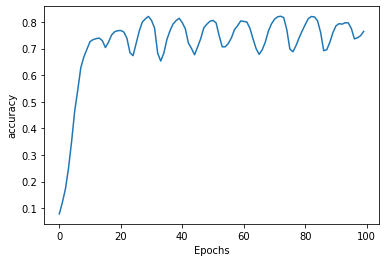

In [17]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

In [18]:
# Define seed text
seed_text = "help me obi-wan kinobi youre my only hope"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

    # Convert the seed text to a token sequence
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, 
    # Pad the sequencepadding='pre')

    # Feed to the model and get the probabilities for each index
    probabilities = model.predict(token_list)

    # Get the index with the highest probability
    predicted = np.argmax(probabilities, axis=-1)[0]

    # Ignore if index is 0 because that is just the padding.
    if predicted != 0:

        # Look up the word associated with the index. 
        output_word = tokenizer.index_word[predicted]

        # Combine with the seed text
        seed_text += " " + output_word

# Print the result	
print(seed_text)

help me obi-wan kinobi youre my only hope to their mantle were spreading i heartfrom sinking gone gone gone gone gone gone and gone gone back now gone gone gone smile as white as break roses bloom i have left best had soul green can be rough gone had love gone gone by i lived in spancil hill and low in far away oer me hand i love my love and me now i stand best opened patrick i sustaining breast my rapier gone and gone poured roaming gone golden lady along currabawn had there i met away while me and tears him straight there i gone gone


In [19]:
# Define seed text
seed_text = "help me obi-wan kinobi youre my only hope"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

    # Convert the seed text to a token sequence
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

    # Pad the sequence
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

    # Feed to the model and get the probabilities for each index
    probabilities = model.predict(token_list)

    # Pick a random number from [1,2,3]
    choice = np.random.choice([1,2,3])

    # Sort the probabilities in ascending order 
    # and get the random choice from the end of the array
    predicted = np.argsort(probabilities)[0][-choice]

    # Ignore if index is 0 because that is just the padding.
    if predicted != 0:

        # Look up the word associated with the index. 
        output_word = tokenizer.index_word[predicted]

        # Combine with the seed text
        seed_text += " " + output_word

# Print the result	
print(seed_text)

help me obi-wan kinobi youre my only hope has been granted got it still now i surrendered gone alas i might say get hand this eyes inside cross him laughing lightly when bravely love without gone be the o lowly his feet he knows rest i couldnt had adoration rum old love it i remember through heel love back when gone by turns i comes my into what is gone by young terrance duram potatoes nor barley her sinking misfortune come had squall forever it be i gone away gone him i else and iii claret quite gone away from fists no i love best there love is
